In [64]:
import pandas as pd

author_df = pd.read_csv('datasets/nytkids_yearly.csv', delimiter=';')
print(author_df.head())

first_name = []
for name in author_df['Author']:
    first_name.append(name.split()[0])
    
author_df['first_name'] = first_name

print(author_df['first_name'].head())

   Year                        Book Title                 Author  \
0  2017                DRAGONS LOVE TACOS             Adam Rubin   
1  2017  THE WONDERFUL THINGS YOU WILL BE  Emily Winfield Martin   
2  2017          THE DAY THE CRAYONS QUIT           Drew Daywalt   
3  2017            ROSIE REVERE, ENGINEER           Andrea Beaty   
4  2017              ADA TWIST, SCIENTIST           Andrea Beaty   

   Besteller this year  
0                   49  
1                   48  
2                   44  
3                   38  
4                   28  
0      Adam
1     Emily
2      Drew
3    Andrea
4    Andrea
Name: first_name, dtype: object


In [66]:
import numpy as np

nysiis_name = []
for name in author_df['first_name']:
    nysiis_name.append(fuz.nysiis(name))

author_df['nysiis_name'] = nysiis_name

author_df.head()

,Year,Book Title,Author,Besteller this year,first_name,nysiis_name
0,2017,DRAGONS LOVE TACOS,Adam Rubin,49,Adam,ADAN
1,2017,THE WONDERFUL THINGS YOU WILL BE,Emily Winfield Martin,48,Emily,ENALY
2,2017,THE DAY THE CRAYONS QUIT,Drew Daywalt,44,Drew,DR
3,2017,"ROSIE REVERE, ENGINEER",Andrea Beaty,38,Andrea,ANDR
4,2017,"ADA TWIST, SCIENTIST",Andrea Beaty,28,Andrea,ANDR


In [68]:
babies_df = pd.read_csv('datasets/babynames_nysiis.csv', delimiter=';')
print(babies_df.head())

gender = []
for index, rows in babies_df.iterrows():
    female = rows['perc_female']
    male = rows['perc_male']
    
    if female > male:
        gender.append('F')
    elif male > female:
        gender.append('M')
    else:
        gender.append('N')

babies_df['gender'] = gender

babies_df.head()

  babynysiis  perc_female  perc_male
0        NaN        62.50      37.50
1        RAX        63.64      36.36
2       ESAR        44.44      55.56
3      DJANG         0.00     100.00
4     PARCAL        25.00      75.00


,babynysiis,perc_female,perc_male,gender
0,NaN,62.50,37.50,F
1,RAX,63.64,36.36,F
2,ESAR,44.44,55.56,M
3,DJANG,0.00,100.00,M
4,PARCAL,25.00,75.00,M


In [70]:
def locate_in_list(a_list, element):
    loc_of_name = a_list.index(element) if element in a_list else -1
    return(loc_of_name)

author_gender = []

for name in author_df['nysiis_name']:
    index = locate_in_list(list(babies_df['babynysiis']), name)
    
    if index == -1:
        author_gender.append("Unknown")
    else:
        author_gender.append(babies_df['gender'][index])
    
author_df['author_gender'] = author_gender

author_df['author_gender'].value_counts()

F          395
M          191
Unknown      9
N            8
Name: author_gender, dtype: int64

In [72]:
years = author_df['Year'].unique()
years.sort()

males_by_yr = []
females_by_yr = []
unknown_by_yr = []

for year in years:
    males_by_yr.append(len(author_df[author_df['Year'] == year][author_df['author_gender'] == 'M']))
    females_by_yr.append(len(author_df[author_df['Year'] == year][author_df['author_gender'] == 'F']))
    unknown_by_yr.append(len(author_df[author_df['Year'] == year][author_df['author_gender'] == 'Unknown']))

print(males_by_yr, females_by_yr, unknown_by_yr)

[8, 19, 27, 21, 21, 11, 21, 18, 25, 20] [15, 45, 48, 51, 46, 51, 34, 30, 32, 43] [1, 3, 0, 1, 0, 2, 1, 0, 0, 1]


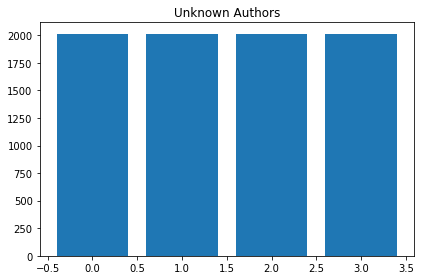

In [74]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.bar(unknown_by_yr, year)
plt.title('Unknown Authors')
plt.show()

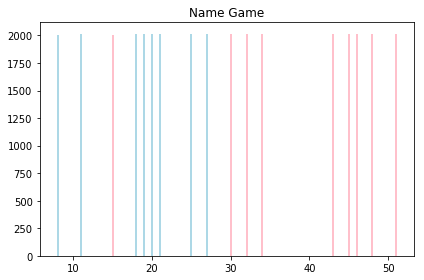

In [76]:
years_shifted = list(years + 0.25)

plt.bar(males_by_yr, years, width=0.25, color='lightblue')
plt.bar(females_by_yr, years_shifted, width=0.25, color='pink')
plt.title("Name Game")
plt.show()